In [1]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

import os.path
import pickle
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib        as mpl
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics         import roc_curve

# Plot settings
mpl.rcParams['legend.frameon' ] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize' ] = 18
mpl.rcParams['axes.labelsize' ] = 18
mpl.rcParams['lines.linewidth'] = 2.5

In [2]:
data4t = pd.read_csv('../data/4topSM.csv')
df4t = pd.DataFrame(data4t)
df4t.head()

,m4top,ht,njet,nbjet,nlep,met,met_phi,lep_pt0,lep_pt1,lep_pt2,...,jet_isb0,jet_isb1,jet_isb2,jet_isb3,jet_isb4,jet_isb5,jet_isb6,jet_isb7,jet_isb8,jet_isb9
0,1480.240498,363.195618,6,3,0,77.773085,1.056524,0.000000,0.000000,0.000000,...,0,0,1,1,0,1,0,0,0,0
1,1279.838371,739.406982,9,5,0,80.217866,-2.799677,0.000000,0.000000,0.000000,...,0,0,1,1,0,1,0,1,1,0
2,995.802801,756.153748,9,5,1,51.067984,1.685508,125.348915,0.000000,0.000000,...,0,0,1,1,0,1,0,1,1,0
3,1382.241903,708.742126,5,2,2,93.307299,3.023522,40.827286,169.840958,0.000000,...,0,0,1,1,0,0,0,0,0,0
4,2706.690433,567.742065,5,2,3,193.714731,2.289553,105.930557,25.705399,83.422684,...,0,0,1,1,0,0,0,0,0,0


In [3]:
datattV = pd.read_csv('../data/ttV.csv')
dfttV = pd.DataFrame(datattV)
dfttV.head()

,m4top,ht,njet,nbjet,nlep,met,met_phi,lep_pt0,lep_pt1,lep_pt2,...,jet_isb0,jet_isb1,jet_isb2,jet_isb3,jet_isb4,jet_isb5,jet_isb6,jet_isb7,jet_isb8,jet_isb9
0,-99.0,898.933899,8,4,1,22.632032,-0.086053,88.720406,0.0,0.0,...,1,0,1,0,0,0,1,1,0,0
1,-99.0,563.983948,4,1,0,26.726042,1.816308,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,-99.0,303.772491,6,1,0,0.000000,0.000000,0.000000,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,-99.0,515.249084,6,1,0,32.442406,1.914836,0.000000,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,-99.0,441.026398,5,2,0,23.852623,-1.567359,0.000000,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0


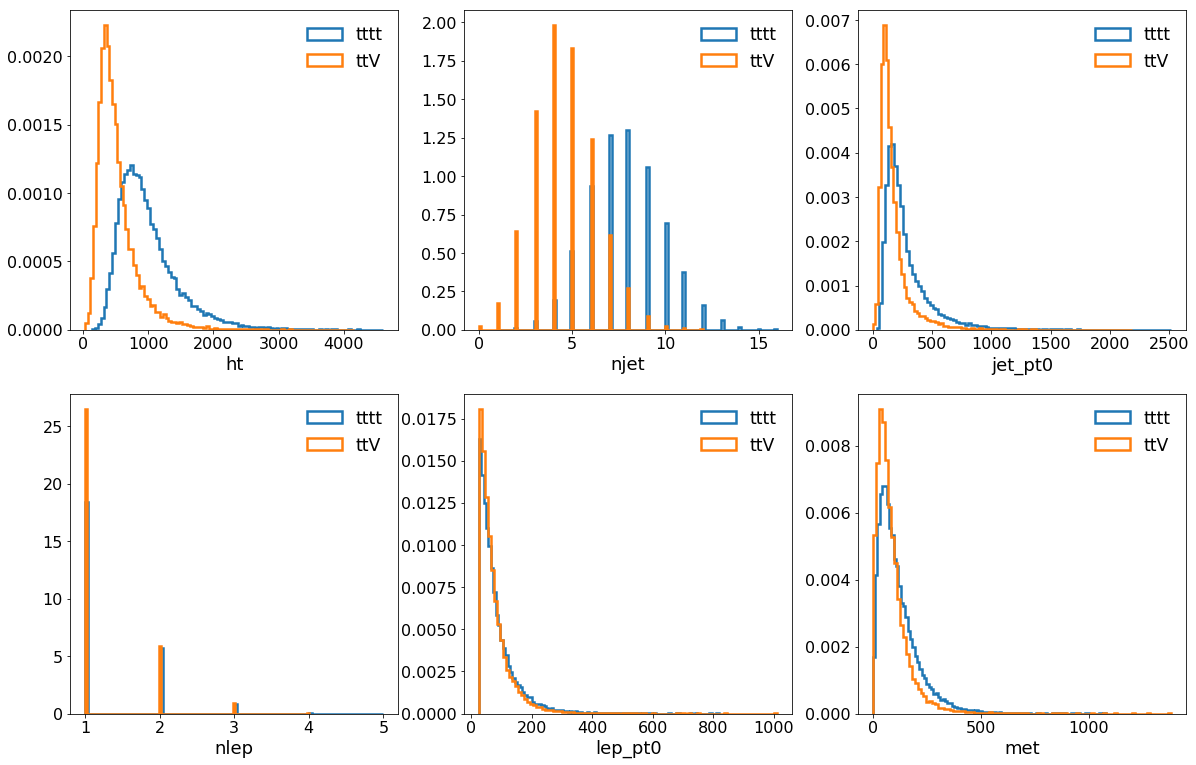

In [4]:
# Function that can be defined in a utils.py module
def overlay_4top_ttV_distributions(data_4top,data_ttV,variables,selection='',myfigsize=(20,20)):
    if (selection is not ''):
        data_4top = data_4top.query(selection)
        data_ttV  = data_ttV .query(selection)

    plt.figure(figsize=myfigsize)
    i=0
    for var in variables:
        if (i>9):
            break
        i=i+1
        plt.subplot(3,3,i)
        plt.hist(data_4top[var], bins=100, histtype='step', density=True, linewidth=2.5,label='tttt')
        plt.hist(data_ttV[var] , bins=100, histtype='step', density=True, linewidth=2.5,label='ttV' )
        plt.legend()
        plt.xlabel(var)
    return


# Function all
overlay_4top_ttV_distributions(df4t,dfttV,['ht','njet','jet_pt0','nlep','lep_pt0','met'],'nlep>0')

NameError: name 'df' is not defined

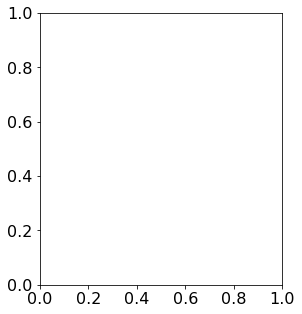

In [5]:
plt.figure(figsize=(20,5))
plt.subplot(141)
plt.hist(df['m4top'], bins=100, histtype='step', linewidth=2.5,label='tttt')
plt.subplot(142)
plt.scatter(df['jet_pt1'],df['m4top'])
plt.subplot(143)
plt.scatter(df['lep_pt1'],df['m4top'])
plt.subplot(144)
plt.scatter(df['met'],df['m4top'])

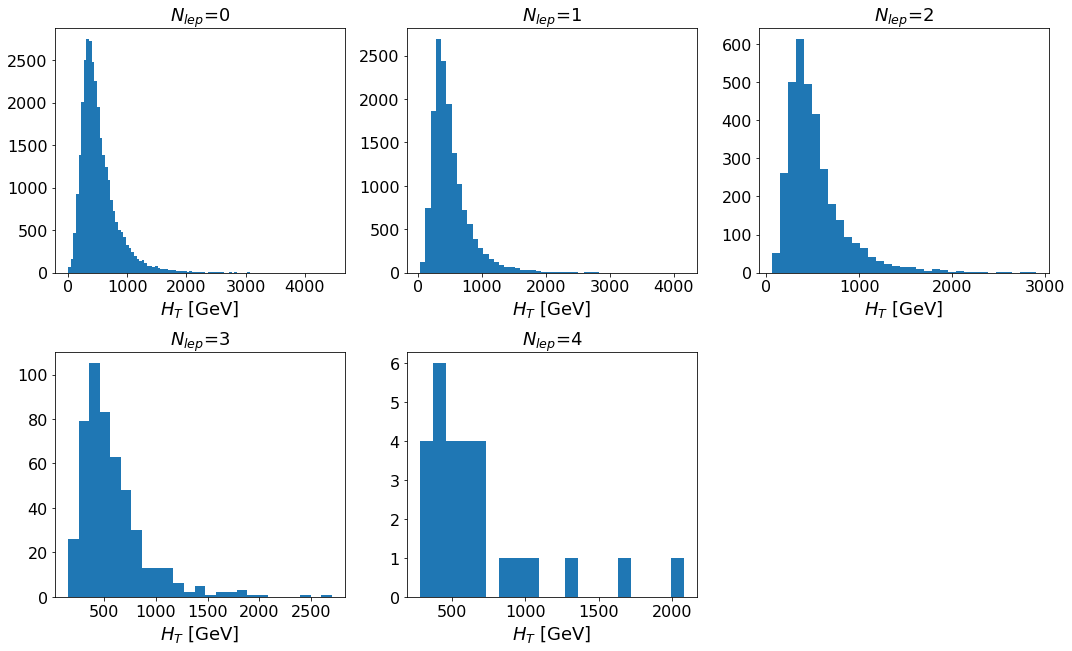

In [6]:
group_ttV_perLep = dfttV.groupby('nlep')

plt.figure(figsize=(15,13))
for nlep,data in group_ttV_perLep:
    plt.subplot(3,3,nlep+1)
    plt.title('$N_{lep}$='+str(nlep))
    plt.hist(data['ht'],bins=int(100/(nlep+1)))
    plt.xlabel('$H_{T}$ [GeV]')
    plt.tight_layout()